In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
pd.set_option('display.max_columns', 300) # to display all the columns
#pd.set_option('display.max_rows', 300)

In [5]:
application_data = pd.read_csv('/content/drive/MyDrive/Loan Case Study/application_data.csv')
prev_application = pd.read_csv('/content/drive/MyDrive/Loan Case Study/previous_application.csv')

In [8]:
application_data.info(verbose=True,null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

#checking null values and imbalance

In [9]:
(((application_data.isnull().sum())/307511)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
# checking imbalace

application_data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

#Spilting data into 2 dataset

In [11]:
app_1 = application_data.where(application_data['TARGET'] == 1).dropna(subset=['TARGET'])
app_0 = application_data.where(application_data['TARGET'] == 0).dropna(subset=['TARGET'])

In [12]:
(((app_1.isnull().sum())/24825)*100).sort_values(ascending=False)

COMMONAREA_MODE                 74.211480
COMMONAREA_AVG                  74.211480
COMMONAREA_MEDI                 74.211480
NONLIVINGAPARTMENTS_MODE        73.824773
NONLIVINGAPARTMENTS_AVG         73.824773
NONLIVINGAPARTMENTS_MEDI        73.824773
FONDKAPREMONT_MODE              73.011078
LIVINGAPARTMENTS_MEDI           72.998993
LIVINGAPARTMENTS_AVG            72.998993
LIVINGAPARTMENTS_MODE           72.998993
FLOORSMIN_MODE                  72.539778
FLOORSMIN_AVG                   72.539778
FLOORSMIN_MEDI                  72.539778
YEARS_BUILD_MEDI                71.504532
YEARS_BUILD_MODE                71.504532
YEARS_BUILD_AVG                 71.504532
OWN_CAR_AGE                     69.482377
LANDAREA_MODE                   64.870091
LANDAREA_MEDI                   64.870091
LANDAREA_AVG                    64.870091
BASEMENTAREA_AVG                64.604230
BASEMENTAREA_MODE               64.604230
BASEMENTAREA_MEDI               64.604230
NONLIVINGAREA_MEDI              61

In [13]:
(((app_0.isnull().sum())/282686)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.491238
COMMONAREA_AVG                  69.491238
COMMONAREA_MODE                 69.491238
NONLIVINGAPARTMENTS_MODE        69.047282
NONLIVINGAPARTMENTS_AVG         69.047282
NONLIVINGAPARTMENTS_MEDI        69.047282
FONDKAPREMONT_MODE              67.980020
LIVINGAPARTMENTS_MODE           67.947122
LIVINGAPARTMENTS_AVG            67.947122
LIVINGAPARTMENTS_MEDI           67.947122
FLOORSMIN_AVG                   67.436661
FLOORSMIN_MODE                  67.436661
FLOORSMIN_MEDI                  67.436661
YEARS_BUILD_MEDI                66.058100
YEARS_BUILD_MODE                66.058100
YEARS_BUILD_AVG                 66.058100
OWN_CAR_AGE                     65.684187
LANDAREA_MEDI                   58.894321
LANDAREA_MODE                   58.894321
LANDAREA_AVG                    58.894321
BASEMENTAREA_MEDI               57.981294
BASEMENTAREA_AVG                57.981294
BASEMENTAREA_MODE               57.981294
EXT_SOURCE_1                    56

In [14]:
((((app_1.isnull().sum())/24825)*100) - (((app_0.isnull().sum())/282686)*100)).sort_values(ascending=False)

EMERGENCYSTATE_MODE             7.586775
TOTALAREA_MODE                  7.551587
ENTRANCES_AVG                   7.501535
ENTRANCES_MEDI                  7.501535
ENTRANCES_MODE                  7.501535
FLOORSMAX_AVG                   7.496968
FLOORSMAX_MEDI                  7.496968
FLOORSMAX_MODE                  7.496968
YEARS_BEGINEXPLUATATION_AVG     7.441036
YEARS_BEGINEXPLUATATION_MODE    7.441036
YEARS_BEGINEXPLUATATION_MEDI    7.441036
APARTMENTS_MODE                 7.389626
APARTMENTS_MEDI                 7.389626
APARTMENTS_AVG                  7.389626
ELEVATORS_MODE                  7.380395
ELEVATORS_AVG                   7.380395
ELEVATORS_MEDI                  7.380395
HOUSETYPE_MODE                  7.290619
LIVINGAREA_MEDI                 7.232433
LIVINGAREA_AVG                  7.232433
LIVINGAREA_MODE                 7.232433
WALLSMATERIAL_MODE              7.229229
NONLIVINGAREA_AVG               7.150340
NONLIVINGAREA_MODE              7.150340
NONLIVINGAREA_ME

It can be observed that around 5-7% people who don't provide information about the place they live like house area, building info etc. default more. Getting these data might reduce the percentage of people who default.

#Binning Values

In [16]:
application_data['INCOME_GROUP']=pd.qcut(application_data['AMT_INCOME_TOTAL'],
                                       q=[0,0.2,0.4,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [20]:
#Creating a column AGE using DAYS_BIRTH
application_data['AGE']=abs(application_data['DAYS_BIRTH'])//365.25

In [22]:
application_data['AGE_GROUP'] = pd.cut(application_data['AGE'],bins=np.arange(20,71,5))

In [23]:
## Adding one more column that will be used for analysis later
application_data['CREDIT_INCOME_RATIO']=round((application_data['AMT_CREDIT']/application_data['AMT_INCOME_TOTAL']))

In [24]:
### Getting the percentage of social circle who defaulted
application_data['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=application_data['DEF_30_CNT_SOCIAL_CIRCLE']/application_data['OBS_30_CNT_SOCIAL_CIRCLE']
application_data['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=application_data['DEF_60_CNT_SOCIAL_CIRCLE']/application_data['OBS_60_CNT_SOCIAL_CIRCLE']

#Data Manipulation

In [25]:
# From the remaining columns about 30 are selected based on their description and relevance with problem statement 
#for further analysis
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [31]:
application_data = application_data[application_data['CODE_GENDER']!='XNA']
application_data['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [32]:
application_data = application_data[FinalColumns]

In [33]:
app_1 = application_data.where(application_data['TARGET'] == 1).dropna(subset=['TARGET'])
app_0 = application_data.where(application_data['TARGET'] == 0).dropna(subset=['TARGET'])

#ANALYSIS

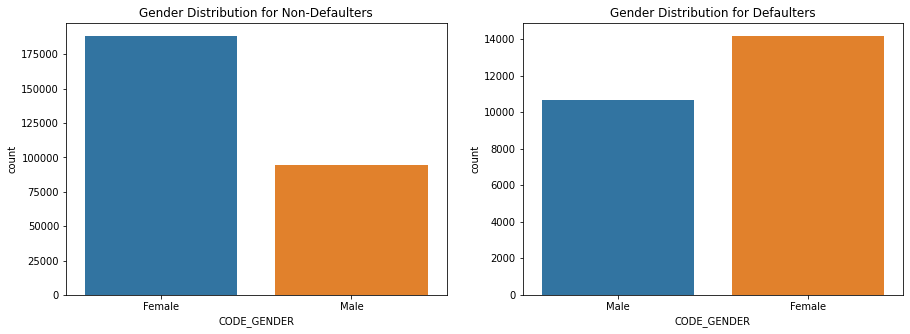

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=app_0['CODE_GENDER'],data=app_0,ax=ax1)
ax1.set_title('Gender Distribution for Non-Defaulters')
sns.countplot(x=app_1['CODE_GENDER'],data=app_0,ax=ax2)
ax2.set_title('Gender Distribution for Defaulters')
plt.show()

The Female take more loan as compared to Males and this can account to fact that more females default than males.

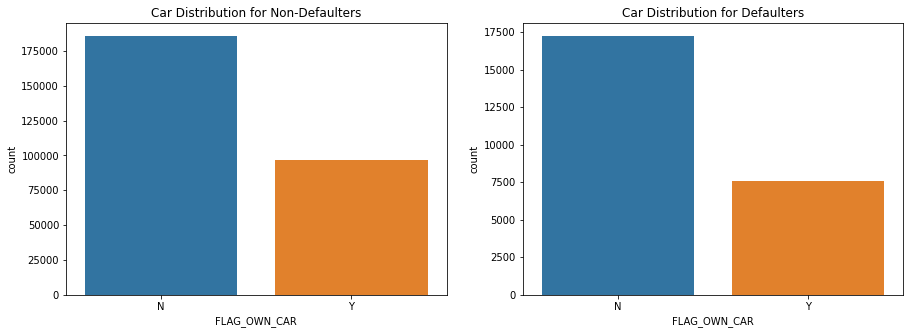

In [46]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=app_0['FLAG_OWN_CAR'],data=app_0,ax=ax1)
ax1.set_title('Car Distribution for Non-Defaulters')
sns.countplot(x=app_1['FLAG_OWN_CAR'],data=app_0,ax=ax2)
ax2.set_title('Car Distribution for Defaulters')
plt.show()

People who dont have car take more loans and hence default more

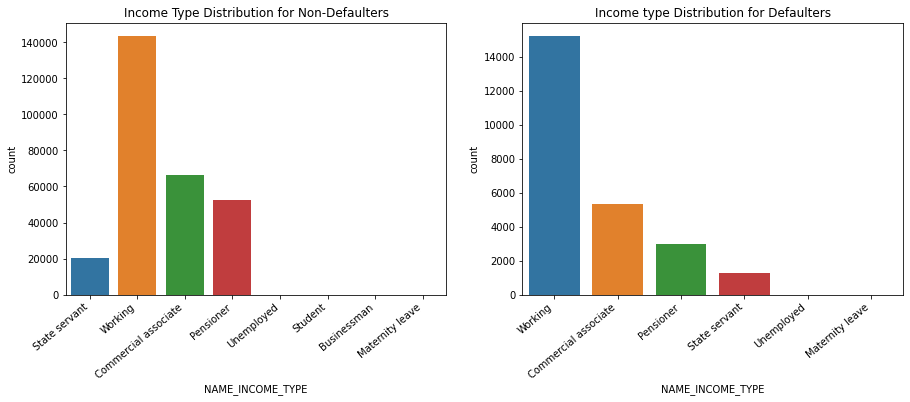

In [49]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=app_0['NAME_INCOME_TYPE'],data=app_0,ax=ax1)
ax1.set_title('Income Type Distribution for Non-Defaulters')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x=app_1['NAME_INCOME_TYPE'],data=app_0,ax=ax2)
ax2.set_title('Income type Distribution for Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.show()

Student and Businessmens dont default because they dont take loan. Most of the loan is taken by working class and they contribute most in the defaulters.

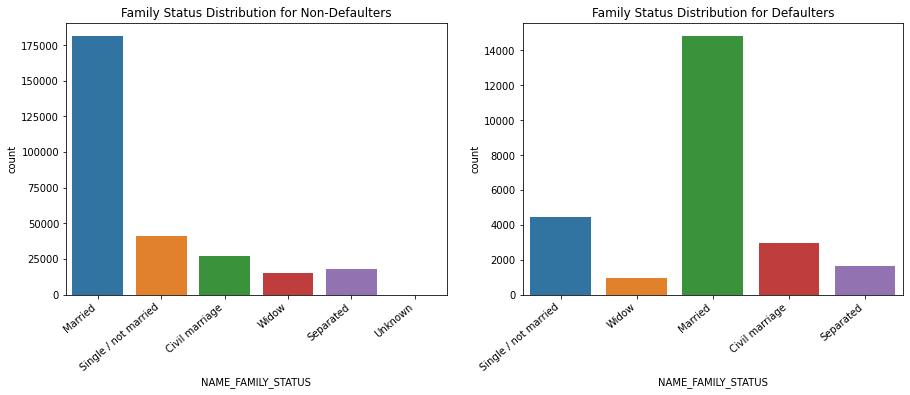

In [50]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=app_0['NAME_FAMILY_STATUS'],data=app_0,ax=ax1)
ax1.set_title('Family Status Distribution for Non-Defaulters')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x=app_1['NAME_FAMILY_STATUS'],data=app_0,ax=ax2)
ax2.set_title('Family Status Distribution for Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.show()

Married people take more loans maybe because of higher expenses.

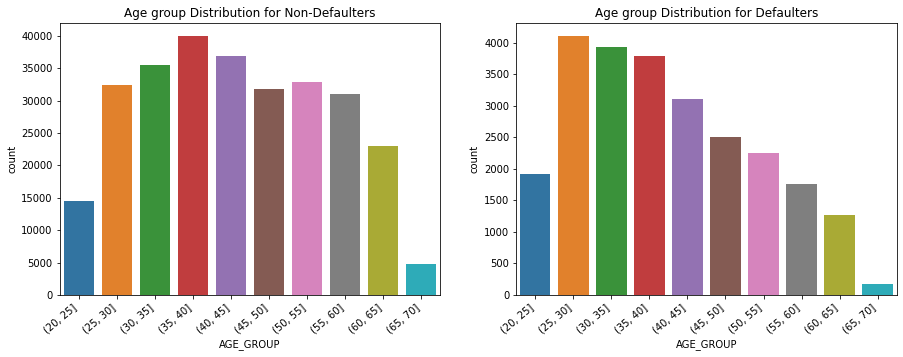

In [52]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=app_0['AGE_GROUP'],data=app_0,ax=ax1)
ax1.set_title('Age group Distribution for Non-Defaulters')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x=app_1['AGE_GROUP'],data=app_0,ax=ax2)
ax2.set_title('Age group Distribution for Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.show()

We can see that the people in age group (35,40) take the most loans could be because of sudden increased expenses during that age group. However, the people that default most are in agr group of (25,30) making them the riskiest could be due to the fact that employement is uncertain during that age as well salary is also low.

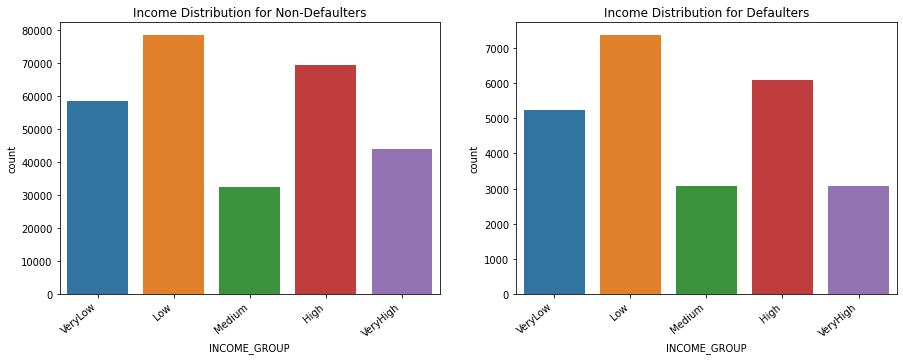

In [53]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=app_0['INCOME_GROUP'],data=app_0,ax=ax1)
ax1.set_title('Income Distribution for Non-Defaulters')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x=app_1['INCOME_GROUP'],data=app_0,ax=ax2)
ax2.set_title('Income Distribution for Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.show()

People with low income apply for more loans and deafult more.

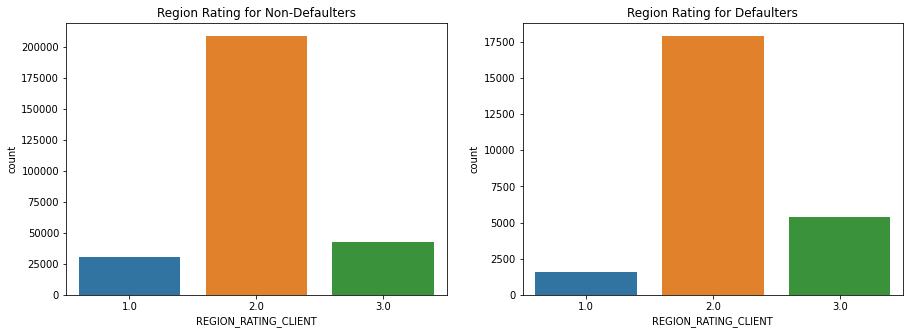

In [54]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=app_0['REGION_RATING_CLIENT'],data=app_0,ax=ax1)
ax1.set_title('Region Rating for Non-Defaulters')
sns.countplot(x=app_1['REGION_RATING_CLIENT'],data=app_0,ax=ax2)
ax2.set_title('Region Rating for Defaulters')
plt.show()

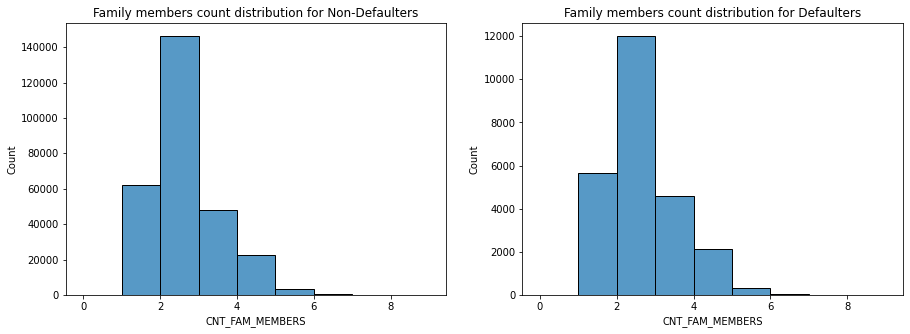

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.histplot(x=app_0['CNT_FAM_MEMBERS'],data=app_0,ax=ax1,bins=range(10))
ax1.set_title('Family members count distribution for Non-Defaulters')
sns.histplot(x=app_1['CNT_FAM_MEMBERS'],data=app_0,ax=ax2,bins=range(10))
ax2.set_title('Family members count distribution for Defaulters')
plt.show()

Family size of 2-3 apply most loans

#Correlation

In [64]:
corr=app_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)
corr_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Column1,Column2,Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.987253
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950148
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.873003
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
272,AMT_ANNUITY,AMT_CREDIT,0.771308
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.628749
273,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418954
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391499
309,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349461


In [63]:
corr=app_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)
corr_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Column1,Column2,Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.874562
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
272,AMT_ANNUITY,AMT_CREDIT,0.752195
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.623163
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298
150,CNT_FAM_MEMBERS,DAYS_REGISTRATION,0.145828
94,DAYS_EMPLOYED,CREDIT_INCOME_RATIO,0.119095
